Matplotlib is building the font cache; this may take a moment.


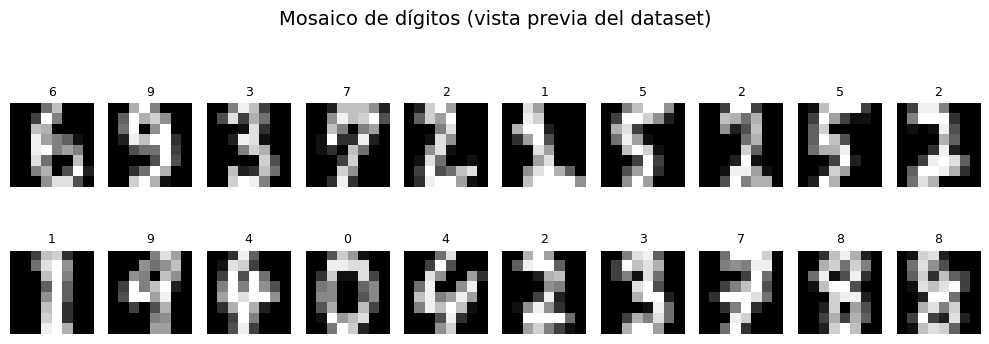

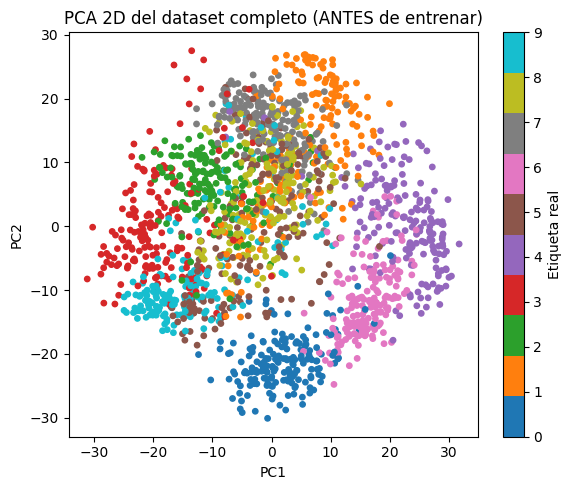

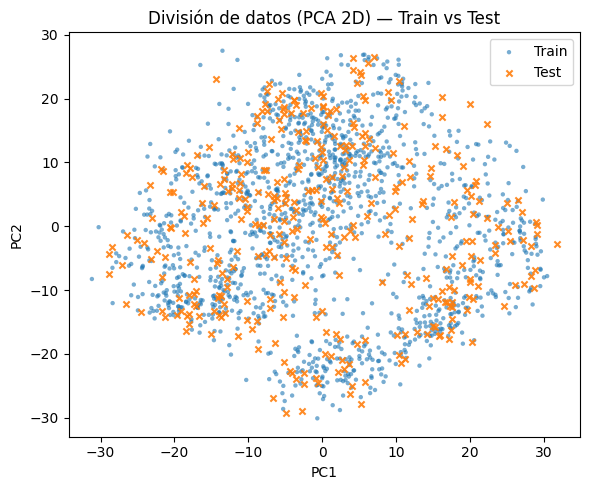

=== Métricas (Test) ===
Accuracy : 0.9694
Precision: 0.9700 (macro)
Recall   : 0.9691 (macro)
F1-score : 0.9689 (macro)

=== Classification report (por clase) ===
              precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.9231    1.0000    0.9600        36
           2     1.0000    1.0000    1.0000        35
           3     0.9730    0.9730    0.9730        37
           4     0.9730    1.0000    0.9863        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    0.9722    0.9859        36
           7     0.9231    1.0000    0.9600        36
           8     0.9375    0.8571    0.8955        35
           9     0.9706    0.9167    0.9429        36

    accuracy                         0.9694       360
   macro avg     0.9700    0.9691    0.9689       360
weighted avg     0.9701    0.9694    0.9692       360



<Figure size 600x500 with 0 Axes>

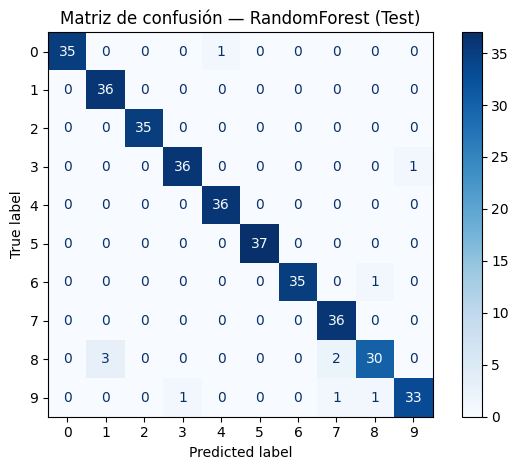

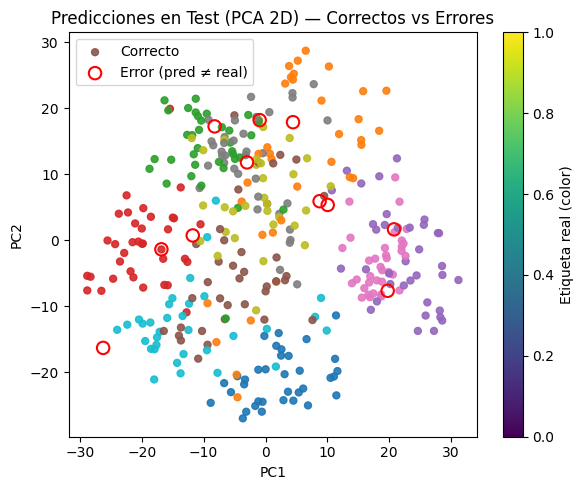

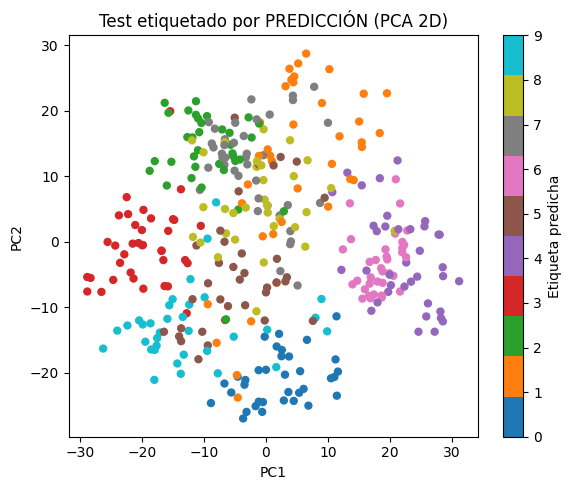

In [1]:
# =========================
# RandomForest en Digits (scikit-learn)
# =========================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# ---------- 1) Cargar dataset ----------
digits = load_digits()
X = digits.data          # (n_muestras, 64)
y = digits.target        # etiquetas 0..9
images = digits.images   # (n_muestras, 8, 8)
classes = digits.target_names

# ---------- 2) Visualización "ANTES" ----------
# 2.1 Mosaico de algunas imágenes representativas
plt.figure(figsize=(10, 4))
n_show = 20
indices = np.random.RandomState(42).choice(len(images), size=n_show, replace=False)
for i, idx in enumerate(indices, 1):
    plt.subplot(2, n_show//2, i)
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"{y[idx]}", fontsize=9)
    plt.axis("off")
plt.suptitle("Mosaico de dígitos (vista previa del dataset)", fontsize=14)
plt.tight_layout()
plt.show()

# 2.2 Proyección PCA 2D de TODO el dataset (coloreado por etiqueta)
pca_all = PCA(n_components=2, random_state=42)
X_pca_all = pca_all.fit_transform(X)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=y, s=15, cmap="tab10")
plt.title("PCA 2D del dataset completo (ANTES de entrenar)")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta real")
plt.tight_layout()
plt.show()

# ---------- 3) Split de datos ----------
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, np.arange(len(X)), test_size=0.2, stratify=y, random_state=42
)

# PCA para visualizar la división Train vs Test en el espacio 2D
pca_split = PCA(n_components=2, random_state=42)
X_pca_split = pca_split.fit_transform(X)
mask_train = np.zeros(len(X), dtype=bool); mask_train[idx_train] = True
mask_test  = np.zeros(len(X), dtype=bool); mask_test[idx_test] = True

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_split[mask_train, 0], X_pca_split[mask_train, 1],
            s=10, alpha=0.6, label="Train", edgecolors='none')
plt.scatter(X_pca_split[mask_test, 0], X_pca_split[mask_test, 1],
            s=20, alpha=0.9, label="Test", marker='x')
plt.title("División de datos (PCA 2D) — Train vs Test")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.tight_layout()
plt.show()

# ---------- 4) Entrenamiento: RandomForest ----------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ---------- 5) Predicciones y métricas ----------
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("=== Métricas (Test) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f} (macro)")
print(f"Recall   : {rec:.4f} (macro)")
print(f"F1-score : {f1:.4f} (macro)\n")
print("=== Classification report (por clase) ===")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

# ---------- 6) Matriz de confusión ----------
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de confusión — RandomForest (Test)")
plt.tight_layout()
plt.show()

# ---------- 7) Visualización "DESPUÉS" ----------
# PCA del conjunto de PRUEBA para visualizar predicciones vs reales
pca_test = PCA(n_components=2, random_state=42)
X_pca_test = pca_test.fit_transform(X_test)

correct = (y_test == y_pred)
plt.figure(figsize=(6, 5))
# Puntos correctos
plt.scatter(X_pca_test[correct, 0], X_pca_test[correct, 1],
            c=y_test[correct], cmap="tab10", s=25, alpha=0.9, label="Correcto")
# Errores
plt.scatter(X_pca_test[~correct, 0], X_pca_test[~correct, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.5, label="Error (pred ≠ real)")
plt.title("Predicciones en Test (PCA 2D) — Correctos vs Errores")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
cbar = plt.colorbar()
cbar.set_label("Etiqueta real (color)")
plt.tight_layout()
plt.show()

# Otra vista "después": mapa de colores por PREDICCIÓN en test
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_pred, s=25, cmap="tab10")
plt.title("Test etiquetado por PREDICCIÓN (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta predicha")
plt.tight_layout()
plt.show()


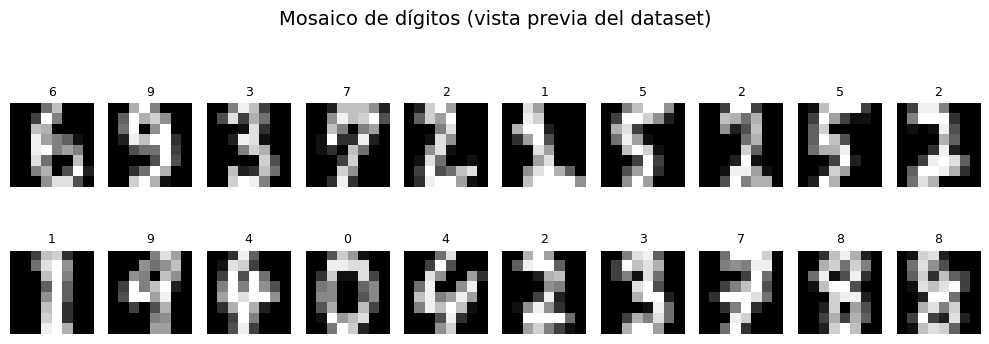

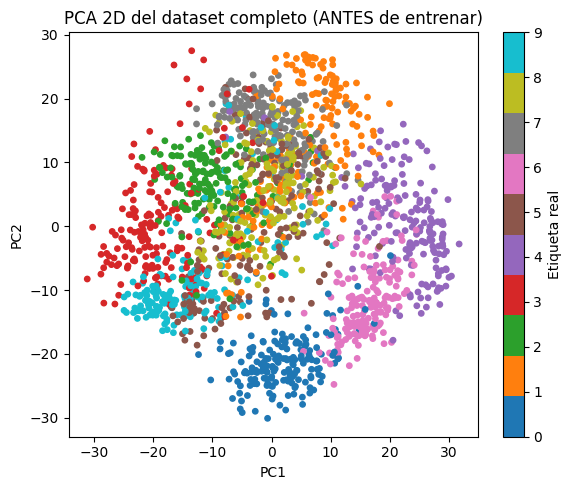

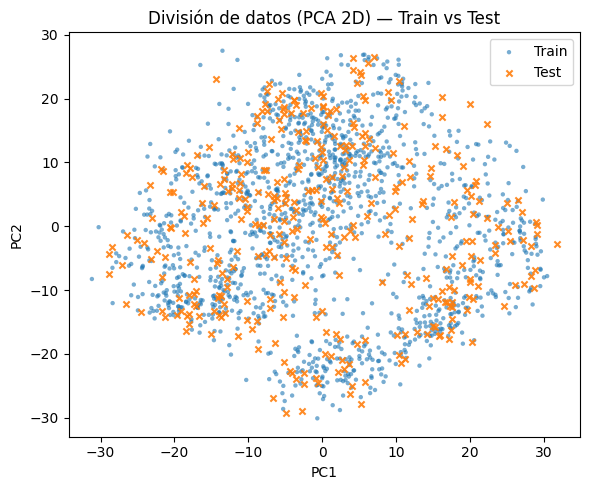

=== Métricas (Test) ===
Accuracy : 0.9694
Precision: 0.9700 (macro)
Recall   : 0.9691 (macro)
F1-score : 0.9689 (macro)

=== Classification report (por clase) ===
              precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.9231    1.0000    0.9600        36
           2     1.0000    1.0000    1.0000        35
           3     0.9730    0.9730    0.9730        37
           4     0.9730    1.0000    0.9863        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    0.9722    0.9859        36
           7     0.9231    1.0000    0.9600        36
           8     0.9375    0.8571    0.8955        35
           9     0.9706    0.9167    0.9429        36

    accuracy                         0.9694       360
   macro avg     0.9700    0.9691    0.9689       360
weighted avg     0.9701    0.9694    0.9692       360



<Figure size 600x500 with 0 Axes>

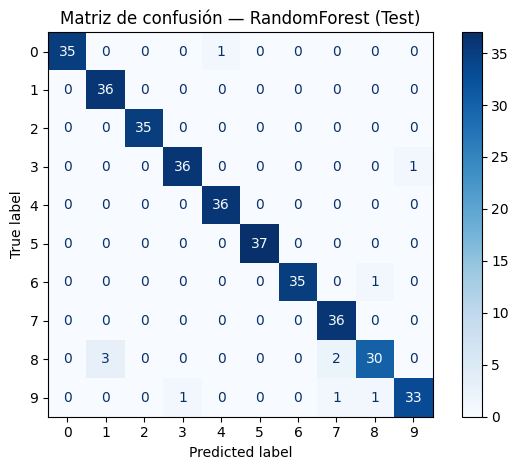

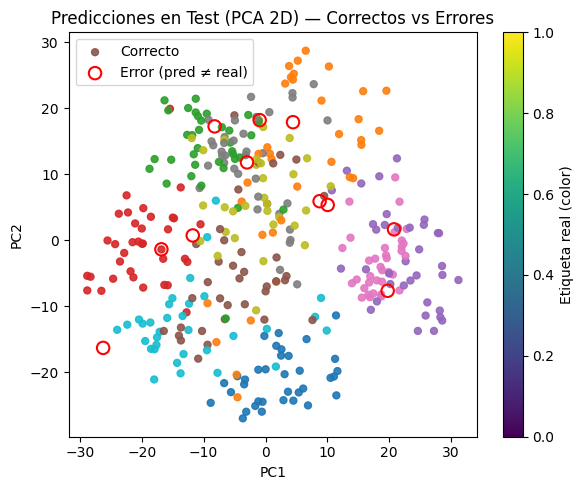

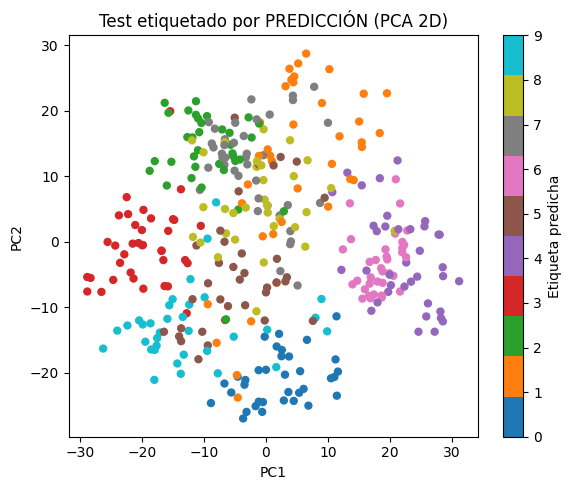

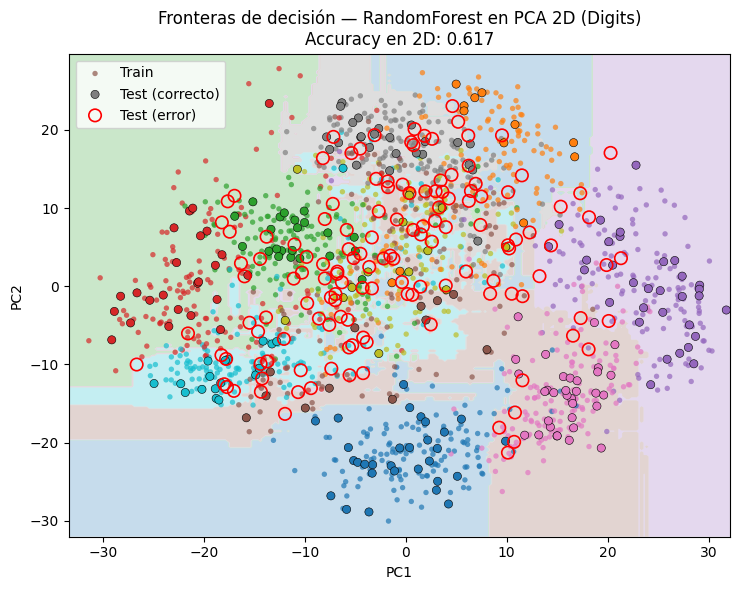

In [2]:
# =========================
# RandomForest en Digits (scikit-learn) + Fronteras de decisión
# =========================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# ---------- 1) Cargar dataset ----------
digits = load_digits()
X = digits.data          # (n_muestras, 64)
y = digits.target        # etiquetas 0..9
images = digits.images   # (n_muestras, 8, 8)
classes = digits.target_names  # array([0,1,...,9])

# ---------- 2) Visualización "ANTES" ----------
# 2.1 Mosaico de algunas imágenes representativas
plt.figure(figsize=(10, 4))
n_show = 20
indices = np.random.RandomState(42).choice(len(images), size=n_show, replace=False)
for i, idx in enumerate(indices, 1):
    plt.subplot(2, n_show//2, i)
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"{y[idx]}", fontsize=9)
    plt.axis("off")
plt.suptitle("Mosaico de dígitos (vista previa del dataset)", fontsize=14)
plt.tight_layout()
plt.show()

# 2.2 Proyección PCA 2D de TODO el dataset (coloreado por etiqueta)
pca_all = PCA(n_components=2, random_state=42)
X_pca_all = pca_all.fit_transform(X)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=y, s=15, cmap="tab10")
plt.title("PCA 2D del dataset completo (ANTES de entrenar)")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta real")
plt.tight_layout()
plt.show()

# ---------- 3) Split de datos ----------
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, np.arange(len(X)), test_size=0.2, stratify=y, random_state=42
)

# PCA para visualizar la división Train vs Test en el espacio 2D
pca_split = PCA(n_components=2, random_state=42)
X_pca_split = pca_split.fit_transform(X)
mask_train = np.zeros(len(X), dtype=bool); mask_train[idx_train] = True
mask_test  = np.zeros(len(X), dtype=bool); mask_test[idx_test] = True

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_split[mask_train, 0], X_pca_split[mask_train, 1],
            s=10, alpha=0.6, label="Train", edgecolors='none')
plt.scatter(X_pca_split[mask_test, 0], X_pca_split[mask_test, 1],
            s=20, alpha=0.9, label="Test", marker='x')
plt.title("División de datos (PCA 2D) — Train vs Test")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.tight_layout()
plt.show()

# ---------- 4) Entrenamiento: RandomForest (en 64 dims) ----------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ---------- 5) Predicciones y métricas ----------
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("=== Métricas (Test) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f} (macro)")
print(f"Recall   : {rec:.4f} (macro)")
print(f"F1-score : {f1:.4f} (macro)\n")
print("=== Classification report (por clase) ===")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

# ---------- 6) Matriz de confusión ----------
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de confusión — RandomForest (Test)")
plt.tight_layout()
plt.show()

# ---------- 7) Visualización "DESPUÉS" ----------
# PCA del conjunto de PRUEBA para visualizar predicciones vs reales
pca_test = PCA(n_components=2, random_state=42)
X_pca_test = pca_test.fit_transform(X_test)

correct = (y_test == y_pred)
plt.figure(figsize=(6, 5))
# Puntos correctos
plt.scatter(X_pca_test[correct, 0], X_pca_test[correct, 1],
            c=y_test[correct], cmap="tab10", s=25, alpha=0.9, label="Correcto")
# Errores
plt.scatter(X_pca_test[~correct, 0], X_pca_test[~correct, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.5, label="Error (pred ≠ real)")
plt.title("Predicciones en Test (PCA 2D) — Correctos vs Errores")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
cbar = plt.colorbar()
cbar.set_label("Etiqueta real (color)")
plt.tight_layout()
plt.show()

# Otra vista "después": mapa de colores por PREDICCIÓN en test
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_pred, s=25, cmap="tab10")
plt.title("Test etiquetado por PREDICCIÓN (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta predicha")
plt.tight_layout()
plt.show()

# ---------- 8) Fronteras de decisión en PCA 2D (cómo divide el algoritmo) ----------
# Nota: para ver fronteras en 2D, entrenamos un RF específico en las 2 componentes PCA.
pca_dec = PCA(n_components=2, random_state=42)
X_train_2d = pca_dec.fit_transform(X_train)   # ajusta PCA con TRAIN
X_test_2d  = pca_dec.transform(X_test)

rf_2d = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_2d.fit(X_train_2d, y_train)
y_pred_2d = rf_2d.predict(X_test_2d)
acc_2d = accuracy_score(y_test, y_pred_2d)

# Malla para pintar regiones
h = 0.25
x_min, x_max = X_train_2d[:, 0].min() - 2, X_train_2d[:, 0].max() + 2
y_min, y_max = X_train_2d[:, 1].min() - 2, X_train_2d[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = rf_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Colores
cmap_regions = ListedColormap(plt.cm.tab10(np.linspace(0, 1, 10)))
cmap_points  = plt.cm.tab10

correct_2d = (y_test == y_pred_2d)

plt.figure(figsize=(7.5, 6))
# Regiones de decisión
plt.contourf(xx, yy, Z, alpha=0.25, cmap=cmap_regions, antialiased=True)

# Puntos TRAIN
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_points,
            s=15, alpha=0.7, edgecolors='none', label="Train")

# Puntos TEST correctos
plt.scatter(X_test_2d[correct_2d, 0], X_test_2d[correct_2d, 1],
            c=y_test[correct_2d], cmap=cmap_points, s=35,
            edgecolors='k', linewidths=0.4, label="Test (correcto)")

# Puntos TEST con error
plt.scatter(X_test_2d[~correct_2d, 0], X_test_2d[~correct_2d, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.2,
            label="Test (error)")

plt.title(f"Fronteras de decisión — RandomForest en PCA 2D (Digits)\nAccuracy en 2D: {acc_2d:.3f}")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())
plt.legend(loc="upper left", frameon=True)
plt.tight_layout()
plt.show()


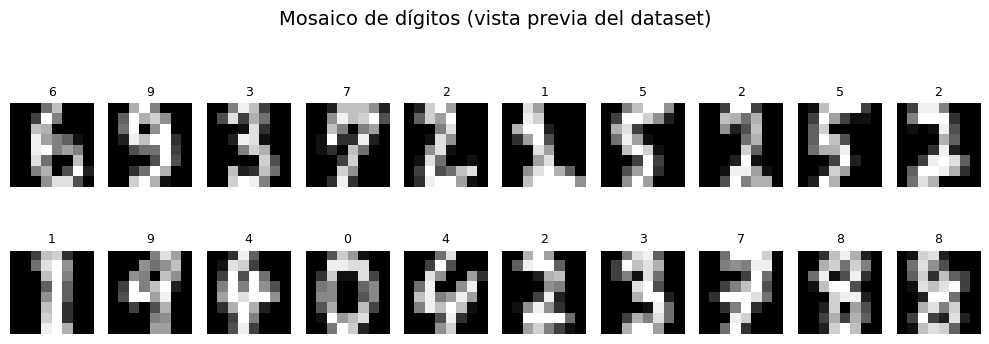

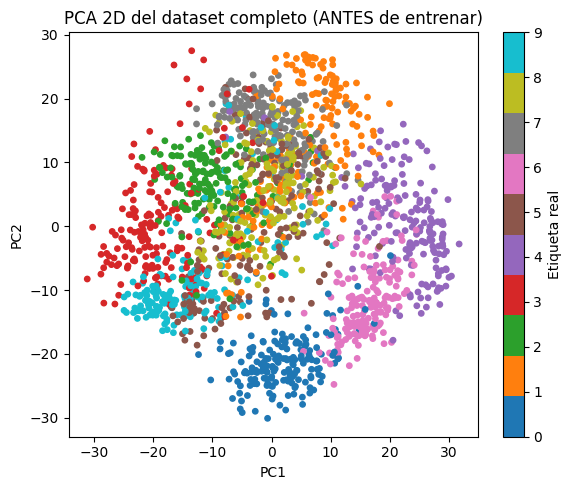

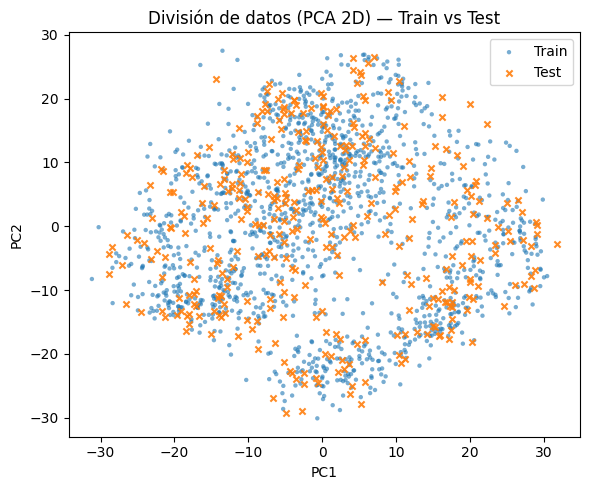

=== Métricas (Test) ===
Accuracy : 0.9667
Precision: 0.9676 (macro)
Recall   : 0.9664 (macro)
F1-score : 0.9665 (macro)

=== Classification report (por clase) ===
              precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.9429    0.9167    0.9296        36
           2     1.0000    0.9714    0.9855        35
           3     0.9737    1.0000    0.9867        37
           4     1.0000    1.0000    1.0000        36
           5     0.9737    1.0000    0.9867        37
           6     1.0000    0.9444    0.9714        36
           7     0.9231    1.0000    0.9600        36
           8     0.8919    0.9429    0.9167        35
           9     0.9706    0.9167    0.9429        36

    accuracy                         0.9667       360
   macro avg     0.9676    0.9664    0.9665       360
weighted avg     0.9677    0.9667    0.9667       360



<Figure size 600x500 with 0 Axes>

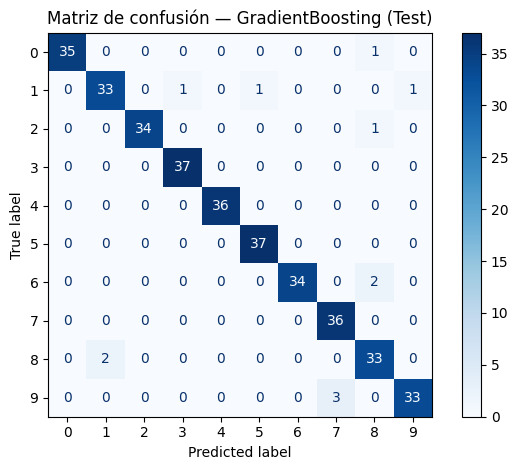

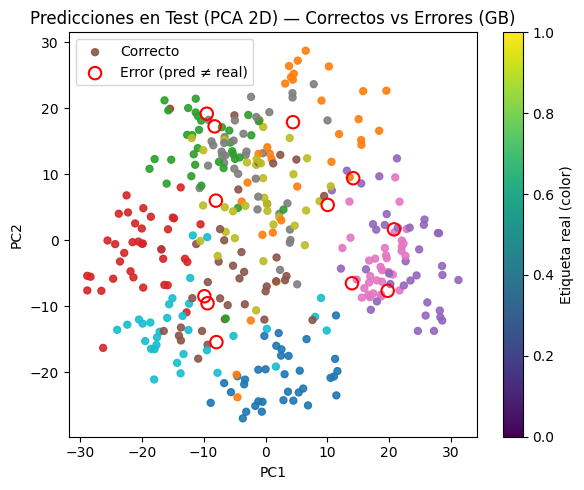

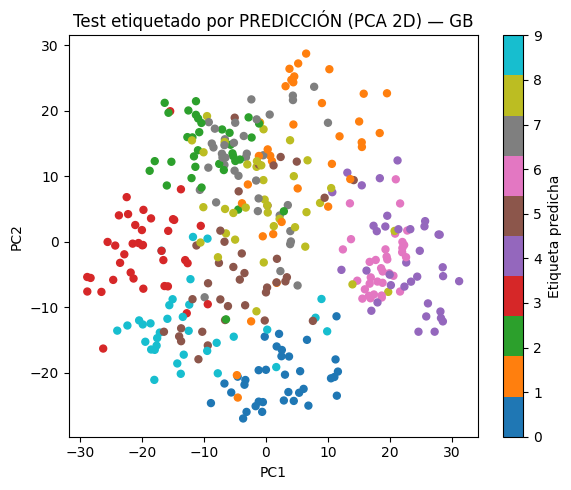

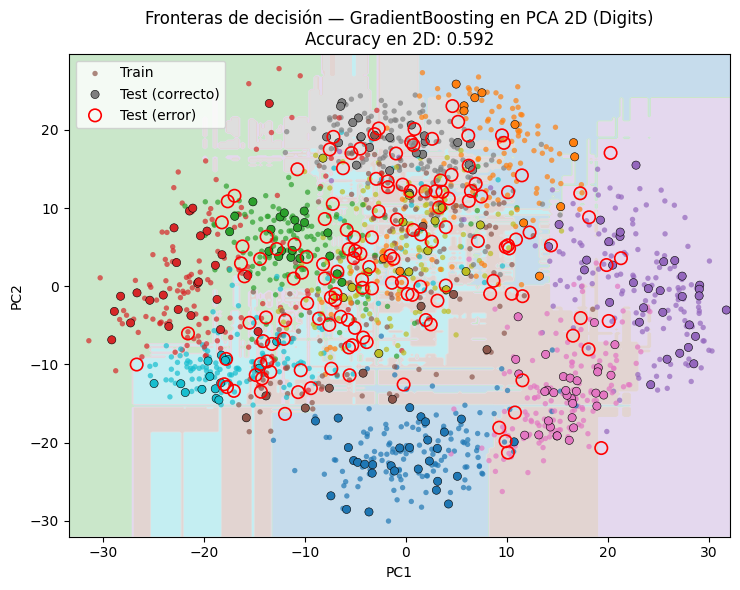

In [3]:
# =========================
# GradientBoosting en Digits (scikit-learn) + Fronteras de decisión
# =========================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# ---------- 1) Cargar dataset ----------
digits = load_digits()
X = digits.data          # (n_muestras, 64)
y = digits.target        # etiquetas 0..9
images = digits.images   # (n_muestras, 8, 8)
classes = digits.target_names  # array([0,1,...,9])

# ---------- 2) Visualización "ANTES" ----------
# 2.1 Mosaico de algunas imágenes representativas
plt.figure(figsize=(10, 4))
n_show = 20
indices = np.random.RandomState(42).choice(len(images), size=n_show, replace=False)
for i, idx in enumerate(indices, 1):
    plt.subplot(2, n_show//2, i)
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"{y[idx]}", fontsize=9)
    plt.axis("off")
plt.suptitle("Mosaico de dígitos (vista previa del dataset)", fontsize=14)
plt.tight_layout()
plt.show()

# 2.2 Proyección PCA 2D de TODO el dataset (coloreado por etiqueta)
pca_all = PCA(n_components=2, random_state=42)
X_pca_all = pca_all.fit_transform(X)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=y, s=15, cmap="tab10")
plt.title("PCA 2D del dataset completo (ANTES de entrenar)")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta real")
plt.tight_layout()
plt.show()

# ---------- 3) Split de datos ----------
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, np.arange(len(X)), test_size=0.2, stratify=y, random_state=42
)

# PCA para visualizar la división Train vs Test en el espacio 2D
pca_split = PCA(n_components=2, random_state=42)
X_pca_split = pca_split.fit_transform(X)
mask_train = np.zeros(len(X), dtype=bool); mask_train[idx_train] = True
mask_test  = np.zeros(len(X), dtype=bool); mask_test[idx_test] = True

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_split[mask_train, 0], X_pca_split[mask_train, 1],
            s=10, alpha=0.6, label="Train", edgecolors='none')
plt.scatter(X_pca_split[mask_test, 0], X_pca_split[mask_test, 1],
            s=20, alpha=0.9, label="Test", marker='x')
plt.title("División de datos (PCA 2D) — Train vs Test")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.tight_layout()
plt.show()

# ---------- 4) Entrenamiento: GradientBoosting (en 64 dims) ----------
gb = GradientBoostingClassifier(
    n_estimators=200,     # puedes ajustar (100-300) según tiempo/precision
    learning_rate=0.1,
    max_depth=3,         # profundidad de los árboles base
    random_state=42
)
gb.fit(X_train, y_train)

# ---------- 5) Predicciones y métricas ----------
y_pred = gb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("=== Métricas (Test) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f} (macro)")
print(f"Recall   : {rec:.4f} (macro)")
print(f"F1-score : {f1:.4f} (macro)\n")
print("=== Classification report (por clase) ===")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

# ---------- 6) Matriz de confusión ----------
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de confusión — GradientBoosting (Test)")
plt.tight_layout()
plt.show()

# ---------- 7) Visualización "DESPUÉS" ----------
# PCA del conjunto de PRUEBA para visualizar predicciones vs reales
pca_test = PCA(n_components=2, random_state=42)
X_pca_test = pca_test.fit_transform(X_test)

correct = (y_test == y_pred)
plt.figure(figsize=(6, 5))
# Puntos correctos
plt.scatter(X_pca_test[correct, 0], X_pca_test[correct, 1],
            c=y_test[correct], cmap="tab10", s=25, alpha=0.9, label="Correcto")
# Errores
plt.scatter(X_pca_test[~correct, 0], X_pca_test[~correct, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.5, label="Error (pred ≠ real)")
plt.title("Predicciones en Test (PCA 2D) — Correctos vs Errores (GB)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
cbar = plt.colorbar()
cbar.set_label("Etiqueta real (color)")
plt.tight_layout()
plt.show()

# Otra vista "después": mapa de colores por PREDICCIÓN en test
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_pred, s=25, cmap="tab10")
plt.title("Test etiquetado por PREDICCIÓN (PCA 2D) — GB")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta predicha")
plt.tight_layout()
plt.show()

# ---------- 8) Fronteras de decisión en PCA 2D (cómo divide el algoritmo) ----------
# Nota: para ver fronteras en 2D, entrenamos un GB específico en las 2 componentes PCA.
pca_dec = PCA(n_components=2, random_state=42)
X_train_2d = pca_dec.fit_transform(X_train)   # ajusta PCA con TRAIN
X_test_2d  = pca_dec.transform(X_test)

gb_2d = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_2d.fit(X_train_2d, y_train)
y_pred_2d = gb_2d.predict(X_test_2d)
acc_2d = accuracy_score(y_test, y_pred_2d)

# Malla para pintar regiones
h = 0.25
x_min, x_max = X_train_2d[:, 0].min() - 2, X_train_2d[:, 0].max() + 2
y_min, y_max = X_train_2d[:, 1].min() - 2, X_train_2d[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = gb_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Colores
cmap_regions = ListedColormap(plt.cm.tab10(np.linspace(0, 1, 10)))
cmap_points  = plt.cm.tab10

correct_2d = (y_test == y_pred_2d)

plt.figure(figsize=(7.5, 6))
# Regiones de decisión
plt.contourf(xx, yy, Z, alpha=0.25, cmap=cmap_regions, antialiased=True)

# Puntos TRAIN
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_points,
            s=15, alpha=0.7, edgecolors='none', label="Train")

# Puntos TEST correctos
plt.scatter(X_test_2d[correct_2d, 0], X_test_2d[correct_2d, 1],
            c=y_test[correct_2d], cmap=cmap_points, s=35,
            edgecolors='k', linewidths=0.4, label="Test (correcto)")

# Puntos TEST con error
plt.scatter(X_test_2d[~correct_2d, 0], X_test_2d[~correct_2d, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.2,
            label="Test (error)")

plt.title(f"Fronteras de decisión — GradientBoosting en PCA 2D (Digits)\nAccuracy en 2D: {acc_2d:.3f}")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())
plt.legend(loc="upper left", frameon=True)
plt.tight_layout()
plt.show()


In [4]:
import micropip
await micropip.install('seaborn')

Configuración completada
Test Size: 0.3
Random State: 42
MLP Parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'random_state': 42}

CARGANDO DATASET DIGITS
Forma de X: (1797, 64)
Forma de y: (1797,)
Forma de imágenes: (1797, 8, 8)
Clases únicas: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9)]
Distribución de clases:
target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64

ANÁLISIS EXPLORATORIO - VISUALIZACIÓN DE DÍGITOS


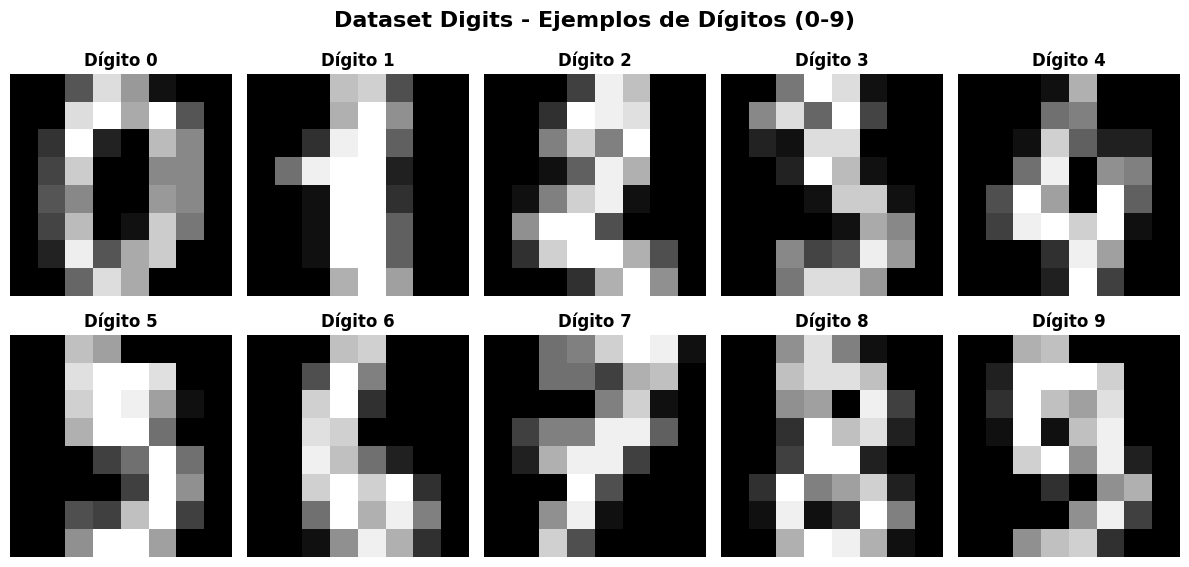

Estadísticas del dataset:
   • Total de muestras: 1797
   • Características por muestra: 64
   • Rango de valores de píxeles: [0.0, 16.0]

PREPROCESAMIENTO - ESCALADO DE CARACTERÍSTICAS
StandardScaler aplicado a las características
Media antes del escalado: 4.884
Desviación estándar antes: 3.684
Media después del escalado: 0.000
Desviación estándar después: 0.976

DIVISIÓN DE DATOS Y ENTRENAMIENTO
Conjuntos de datos:
   • Entrenamiento: 1257 muestras
   • Prueba: 540 muestras

Entrenando MLPClassifier...
Entrenamiento completado

MÉTRICAS DE EVALUACIÓN
REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.92      0.98      0.95        55
           2       0.98      0.98      0.98        53
           3       1.00      1.00      1.00        55
           4       0.98      0.98      0.98        54
           5       1.00      0.98      0.99        55
           6       1.00      0.98   

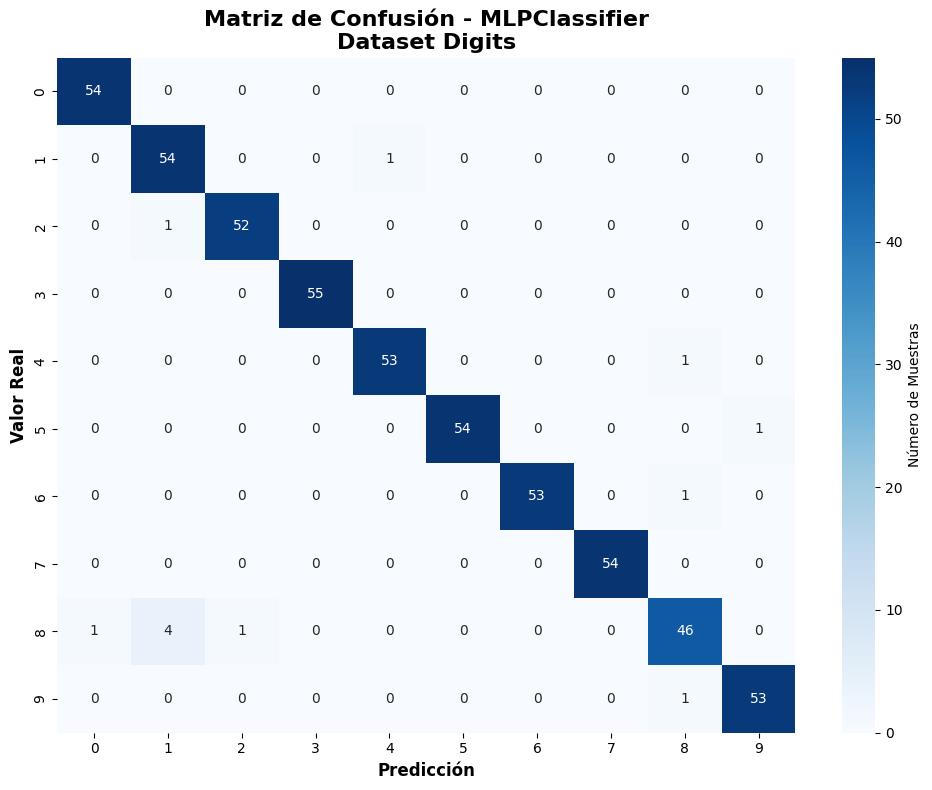


FRONTERAS DE DECISIÓN CON PCA
Aplicando PCA a datos originales (sin escalar)...
PCA completado. Varianza explicada: 0.285
Entrenando MLPClassifier para visualización 2D...
Accuracy en 2D: 0.6667
Generando fronteras de decisión...


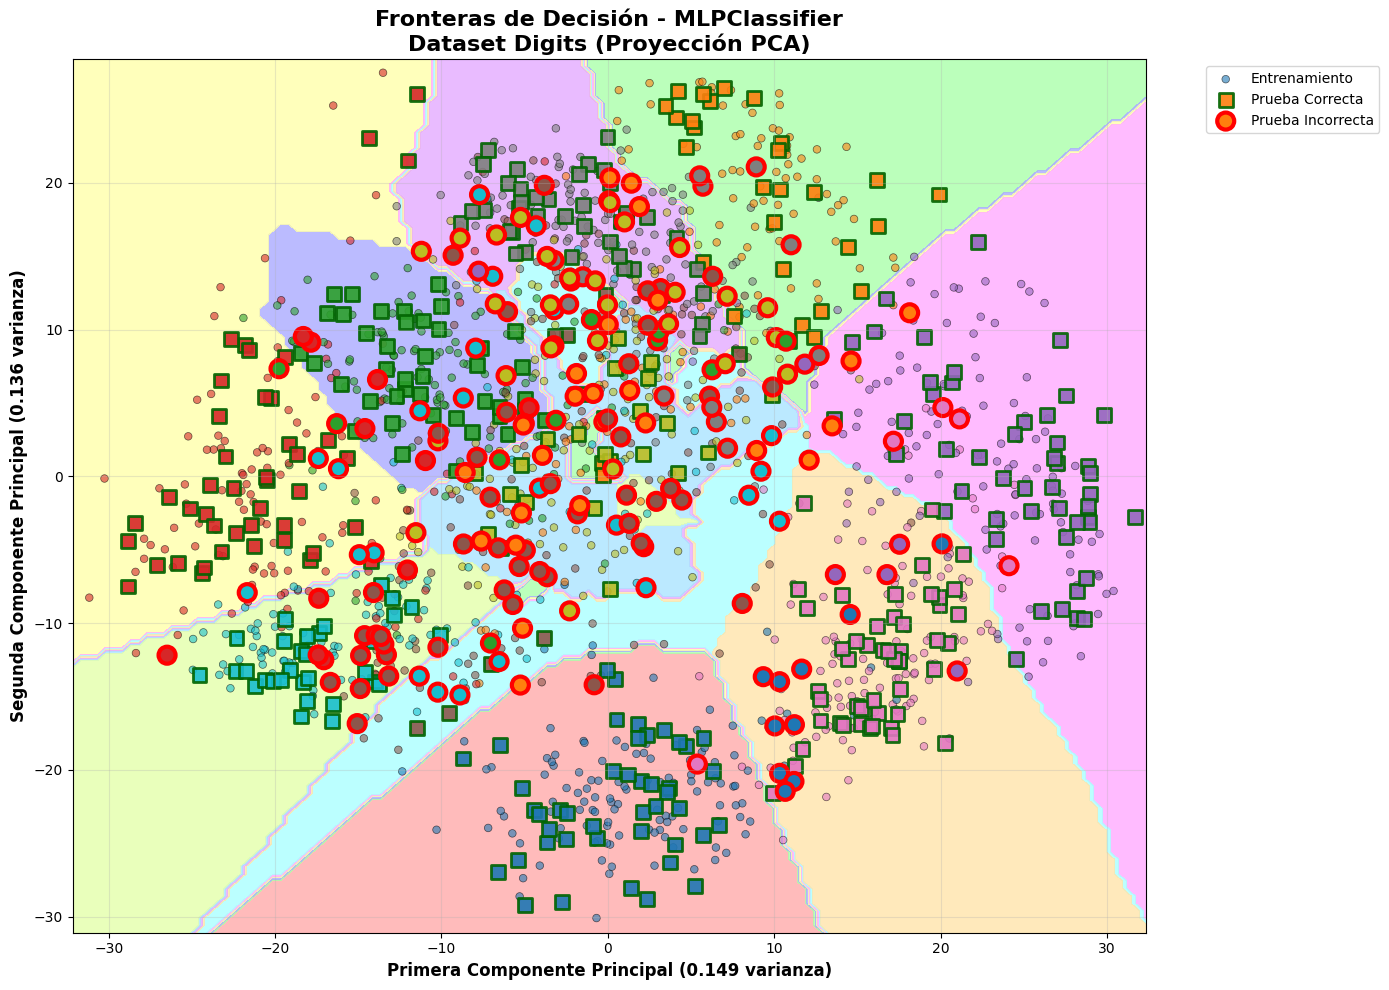


RESUMEN FINAL DEL ANÁLISIS
Modelo: MLPClassifier
Dataset: Digits (8x8 píxeles)
Accuracy Principal: 0.9778
Accuracy en 2D (PCA): 0.6667
F1-Score (macro): 0.9775
Total de muestras analizadas: 1797
Muestras de prueba incorrectas: 180
ANÁLISIS COMPLETADO EXITOSAMENTE


In [5]:
# ================================================================================================
# ANÁLISIS DEL DATASET DIGITS CON MLPClassifier
# ================================================================================================

# ================================================================================================
# 1. PARÁMETROS Y CONFIGURACIÓN
# ================================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

# Parámetros globales
TEST_SIZE = 0.3
RANDOM_STATE = 42

# Parámetros específicos para MLPClassifier
MLP_PARAMS = {
    'hidden_layer_sizes': (100, 50),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.0001,
    'learning_rate': 'constant',
    'learning_rate_init': 0.001,
    'max_iter': 1000,
    'random_state': RANDOM_STATE
}

print("Configuración completada")
print(f"Test Size: {TEST_SIZE}")
print(f"Random State: {RANDOM_STATE}")
print(f"MLP Parameters: {MLP_PARAMS}")

# ================================================================================================
# 2. CARGA DE DATOS
# ================================================================================================
print("\n" + "="*50)
print("CARGANDO DATASET DIGITS")
print("="*50)

# Cargar dataset Digits
digits_data = load_digits(as_frame=True)
X = digits_data.data  # 64 características (8x8 píxeles)
y = digits_data.target  # 10 clases (dígitos 0-9)
images = digits_data.images  # Imágenes en formato 8x8

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Forma de imágenes: {images.shape}")
print(f"Clases únicas: {sorted(y.unique())}")
print(f"Distribución de clases:")
print(y.value_counts().sort_index())

# ================================================================================================
# 3. GRÁFICO "ANTES" - ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# ================================================================================================
print("\n" + "="*50)
print("ANÁLISIS EXPLORATORIO - VISUALIZACIÓN DE DÍGITOS")
print("="*50)

# Crear figura para mostrar ejemplos de dígitos
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Dataset Digits - Ejemplos de Dígitos (0-9)', fontsize=16, fontweight='bold')

for digit in range(10):
    # Encontrar el primer ejemplo de cada dígito
    idx = np.where(y == digit)[0][0]
    
    # Posición en la grilla
    row = digit // 5
    col = digit % 5
    
    # Mostrar imagen
    axes[row, col].imshow(images[idx], cmap='gray')
    axes[row, col].set_title(f'Dígito {digit}', fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"Estadísticas del dataset:")
print(f"   • Total de muestras: {len(X)}")
print(f"   • Características por muestra: {X.shape[1]}")
print(f"   • Rango de valores de píxeles: [{X.values.min():.1f}, {X.values.max():.1f}]")

# ================================================================================================
# 4. PREPROCESAMIENTO CRUCIAL - STANDARDSCALER
# ================================================================================================
print("\n" + "="*50)
print("PREPROCESAMIENTO - ESCALADO DE CARACTERÍSTICAS")
print("="*50)

# PASO CRUCIAL: Aplicar StandardScaler antes del split
# Esto es muy importante para el rendimiento de MLPClassifier
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("StandardScaler aplicado a las características")
print(f"Media antes del escalado: {X.mean().mean():.3f}")
print(f"Desviación estándar antes: {X.std().mean():.3f}")
print(f"Media después del escalado: {X_scaled.mean():.3f}")
print(f"Desviación estándar después: {X_scaled.std():.3f}")

# ================================================================================================
# 5. DIVISIÓN DE DATOS Y ENTRENAMIENTO
# ================================================================================================
print("\n" + "="*50)
print("DIVISIÓN DE DATOS Y ENTRENAMIENTO")
print("="*50)

# División de datos escalados
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

print(f"Conjuntos de datos:")
print(f"   • Entrenamiento: {X_train.shape[0]} muestras")
print(f"   • Prueba: {X_test.shape[0]} muestras")

# Entrenamiento del modelo principal
print(f"\nEntrenando MLPClassifier...")
mlp_main = MLPClassifier(**MLP_PARAMS)
mlp_main.fit(X_train, y_train)

# Predicciones
y_pred = mlp_main.predict(X_test)

print("Entrenamiento completado")

# ================================================================================================
# 6. MÉTRICAS DE EVALUACIÓN
# ================================================================================================
print("\n" + "="*50)
print("MÉTRICAS DE EVALUACIÓN")
print("="*50)

# Classification Report completo
print("REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred))

# Métricas individuales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nMÉTRICAS RESUMIDAS:")
print(f"   • Accuracy:  {accuracy:.4f}")
print(f"   • Precision: {precision:.4f} (macro)")
print(f"   • Recall:    {recall:.4f} (macro)")
print(f"   • F1-Score:  {f1:.4f} (macro)")

# ================================================================================================
# 7. VISUALIZACIONES "DESPUÉS" - MATRIZ DE CONFUSIÓN
# ================================================================================================
print("\n" + "="*50)
print("MATRIZ DE CONFUSIÓN")
print("="*50)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear visualización
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Número de Muestras'})
plt.title('Matriz de Confusión - MLPClassifier\nDataset Digits', fontsize=16, fontweight='bold')
plt.xlabel('Predicción', fontsize=12, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# ================================================================================================
# 8. GRÁFICO DE FRONTERAS DE DECISIÓN (RÉPLICA EXACTA)
# ================================================================================================
print("\n" + "="*50)
print("FRONTERAS DE DECISIÓN CON PCA")
print("="*50)

# IMPORTANTE: Usar datos ORIGINALES sin escalar para PCA (réplica exacta)
print("Aplicando PCA a datos originales (sin escalar)...")
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)  # Usar X original, no X_scaled

# División de datos PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

print(f"PCA completado. Varianza explicada: {pca.explained_variance_ratio_.sum():.3f}")

# Entrenar nuevo MLPClassifier para datos 2D
print("Entrenando MLPClassifier para visualización 2D...")
mlp_2d = MLPClassifier(
    hidden_layer_sizes=(50, 25),  # Capas más pequeñas para 2D
    activation='relu',
    solver='adam',
    alpha=0.001,
    max_iter=1000,
    random_state=RANDOM_STATE
)
mlp_2d.fit(X_train_pca, y_train_pca)

# Predicciones para datos 2D
y_pred_pca = mlp_2d.predict(X_test_pca)

print(f"Accuracy en 2D: {accuracy_score(y_test_pca, y_pred_pca):.4f}")

# Crear malla para fronteras de decisión
print("Generando fronteras de decisión...")
h = 0.5  # Paso de la malla
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicciones de la malla
Z = mlp_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear visualización
plt.figure(figsize=(14, 10))

# Colores para las clases
colors = plt.cm.tab10(np.linspace(0, 1, 10))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', 
                            '#FFAAFF', '#AAFFFF', '#FFE4AA', '#E4AAFF',
                            '#AAE4FF', '#E4FFAA'])

# Fronteras de decisión
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light, levels=np.arange(-0.5, 10.5, 1))

# Puntos de entrenamiento
scatter_train = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                           c=y_train_pca, cmap=plt.cm.tab10, 
                           s=30, alpha=0.6, edgecolors='black', linewidth=0.5,
                           label='Entrenamiento')

# Puntos de prueba correctos
correct_mask = y_test_pca == y_pred_pca
scatter_correct = plt.scatter(X_test_pca[correct_mask, 0], X_test_pca[correct_mask, 1], 
                             c=y_test_pca[correct_mask], cmap=plt.cm.tab10, 
                             s=100, alpha=0.9, edgecolors='darkgreen', linewidth=2,
                             marker='s', label='Prueba Correcta')

# Puntos de prueba incorrectos
incorrect_mask = ~correct_mask
if incorrect_mask.sum() > 0:
    scatter_incorrect = plt.scatter(X_test_pca[incorrect_mask, 0], X_test_pca[incorrect_mask, 1], 
                                   c=y_test_pca[incorrect_mask], cmap=plt.cm.tab10, 
                                   s=150, alpha=1.0, edgecolors='red', linewidth=3,
                                   marker='o', label='Prueba Incorrecta')

plt.title('Fronteras de Decisión - MLPClassifier\nDataset Digits (Proyección PCA)', 
          fontsize=16, fontweight='bold')
plt.xlabel(f'Primera Componente Principal ({pca.explained_variance_ratio_[0]:.3f} varianza)', 
           fontsize=12, fontweight='bold')
plt.ylabel(f'Segunda Componente Principal ({pca.explained_variance_ratio_[1]:.3f} varianza)', 
           fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ================================================================================================
# 9. RESUMEN FINAL
# ================================================================================================
print("\n" + "="*50)
print("RESUMEN FINAL DEL ANÁLISIS")
print("="*50)
print(f"Modelo: MLPClassifier")
print(f"Dataset: Digits (8x8 píxeles)")
print(f"Accuracy Principal: {accuracy:.4f}")
print(f"Accuracy en 2D (PCA): {accuracy_score(y_test_pca, y_pred_pca):.4f}")
print(f"F1-Score (macro): {f1:.4f}")
print(f"Total de muestras analizadas: {len(X)}")
print(f"Muestras de prueba incorrectas: {incorrect_mask.sum()}")
print("="*50)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")

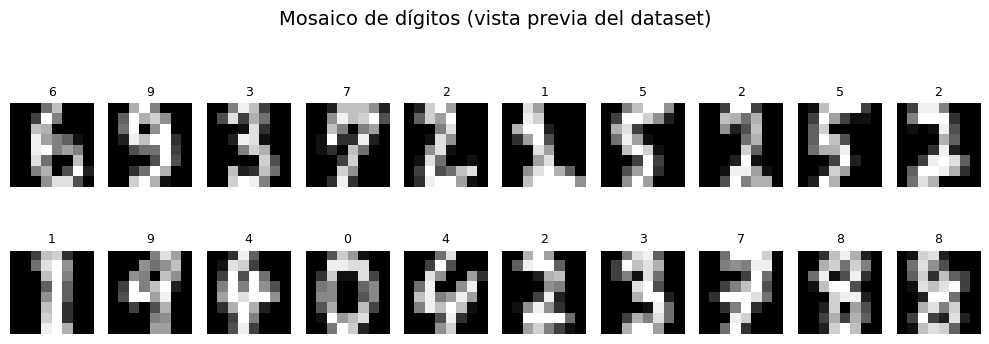

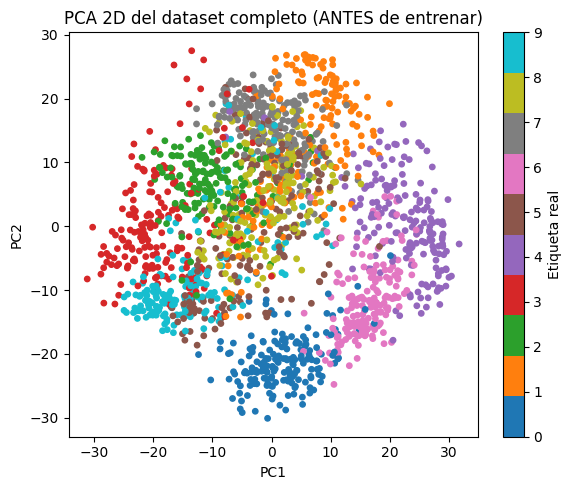

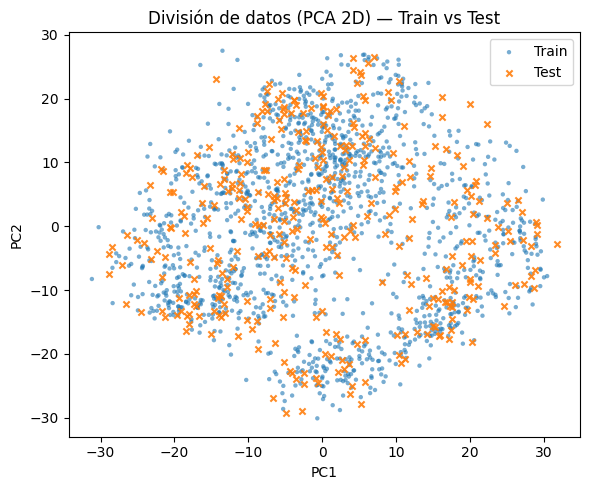

=== Métricas (Test) ===
Accuracy : 0.8111
Precision: 0.8463 (macro)
Recall   : 0.8103 (macro)
F1-score : 0.8137 (macro)

=== Classification report (por clase) ===
              precision    recall  f1-score   support

           0     1.0000    0.9167    0.9565        36
           1     0.6905    0.8056    0.7436        36
           2     0.8261    0.5429    0.6552        35
           3     1.0000    0.7027    0.8254        37
           4     0.9630    0.7222    0.8254        36
           5     0.9459    0.9459    0.9459        37
           6     0.9459    0.9722    0.9589        36
           7     0.7292    0.9722    0.8333        36
           8     0.5000    0.8286    0.6237        35
           9     0.8621    0.6944    0.7692        36

    accuracy                         0.8111       360
   macro avg     0.8463    0.8103    0.8137       360
weighted avg     0.8480    0.8111    0.8151       360



<Figure size 600x500 with 0 Axes>

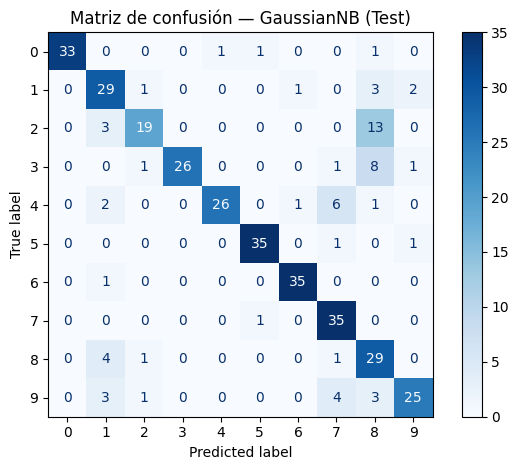

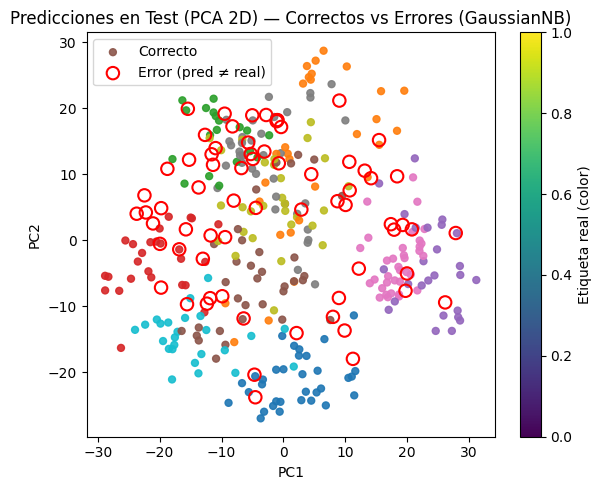

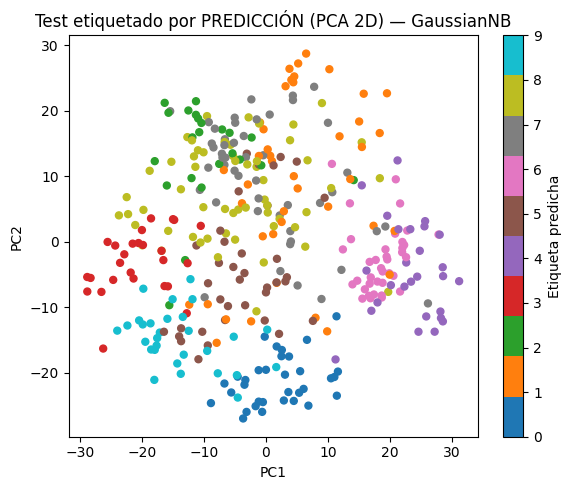

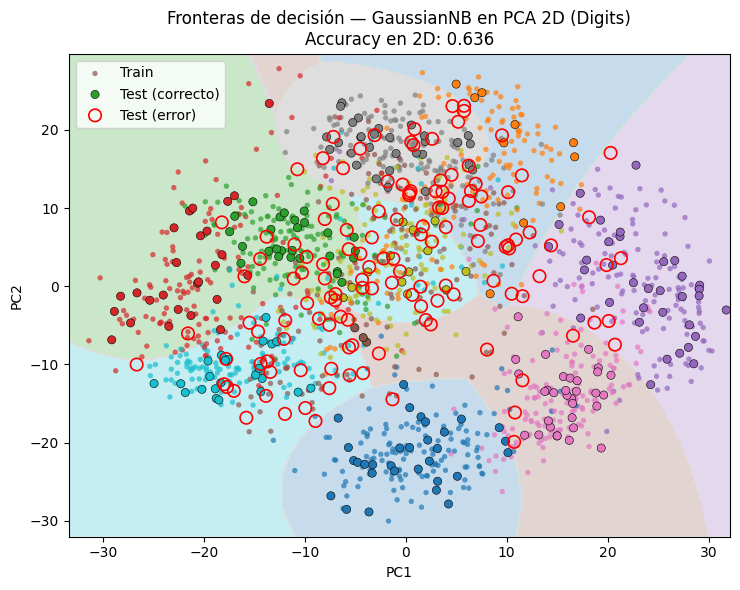

In [6]:
# =========================
# GaussianNB en Digits (scikit-learn) + Fronteras de decisión
# =========================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Parámetros globales
TEST_SIZE = 0.2
RANDOM_STATE = 42

# ---------- 1) Cargar dataset ----------
digits = load_digits()
X = digits.data          # (n_muestras, 64)
y = digits.target        # etiquetas 0..9
images = digits.images   # (n_muestras, 8, 8)
classes = digits.target_names  # array([0,1,...,9])

# ---------- 2) Visualización "ANTES" ----------
# 2.1 Mosaico de algunas imágenes representativas
plt.figure(figsize=(10, 4))
n_show = 20
indices = np.random.RandomState(RANDOM_STATE).choice(len(images), size=n_show, replace=False)
for i, idx in enumerate(indices, 1):
    plt.subplot(2, n_show//2, i)
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"{y[idx]}", fontsize=9)
    plt.axis("off")
plt.suptitle("Mosaico de dígitos (vista previa del dataset)", fontsize=14)
plt.tight_layout()
plt.show()

# 2.2 Proyección PCA 2D de TODO el dataset (coloreado por etiqueta)
pca_all = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca_all = pca_all.fit_transform(X)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=y, s=15, cmap="tab10")
plt.title("PCA 2D del dataset completo (ANTES de entrenar)")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta real")
plt.tight_layout()
plt.show()

# ---------- 3) Split de datos ----------
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, np.arange(len(X)), test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

# PCA para visualizar la división Train vs Test en el espacio 2D
pca_split = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca_split = pca_split.fit_transform(X)
mask_train = np.zeros(len(X), dtype=bool); mask_train[idx_train] = True
mask_test  = np.zeros(len(X), dtype=bool); mask_test[idx_test] = True

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_split[mask_train, 0], X_pca_split[mask_train, 1],
            s=10, alpha=0.6, label="Train", edgecolors='none')
plt.scatter(X_pca_split[mask_test, 0], X_pca_split[mask_test, 1],
            s=20, alpha=0.9, label="Test", marker='x')
plt.title("División de datos (PCA 2D) — Train vs Test")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.tight_layout()
plt.show()

# ---------- 4) Entrenamiento: GaussianNB (en 64 dims, sin escalar) ----------
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# ---------- 5) Predicciones y métricas ----------
y_pred = gnb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("=== Métricas (Test) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f} (macro)")
print(f"Recall   : {rec:.4f} (macro)")
print(f"F1-score : {f1:.4f} (macro)\n")
print("=== Classification report (por clase) ===")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

# ---------- 6) Matriz de confusión ----------
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de confusión — GaussianNB (Test)")
plt.tight_layout()
plt.show()

# ---------- 7) Visualización "DESPUÉS" ----------
# PCA del conjunto de PRUEBA para visualizar predicciones vs reales
pca_test = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca_test = pca_test.fit_transform(X_test)

correct = (y_test == y_pred)
plt.figure(figsize=(6, 5))
# Puntos correctos
plt.scatter(X_pca_test[correct, 0], X_pca_test[correct, 1],
            c=y_test[correct], cmap="tab10", s=25, alpha=0.9, label="Correcto")
# Errores
plt.scatter(X_pca_test[~correct, 0], X_pca_test[~correct, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.5, label="Error (pred ≠ real)")
plt.title("Predicciones en Test (PCA 2D) — Correctos vs Errores (GaussianNB)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
cbar = plt.colorbar()
cbar.set_label("Etiqueta real (color)")
plt.tight_layout()
plt.show()

# Otra vista "después": mapa de colores por PREDICCIÓN en test
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_pred, s=25, cmap="tab10")
plt.title("Test etiquetado por PREDICCIÓN (PCA 2D) — GaussianNB")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta predicha")
plt.tight_layout()
plt.show()

# ---------- 8) Fronteras de decisión en PCA 2D (cómo divide el algoritmo) ----------
# Nota: para ver fronteras en 2D, entrenamos un GaussianNB específico en las 2 componentes PCA.
pca_dec = PCA(n_components=2, random_state=RANDOM_STATE)
X_train_2d = pca_dec.fit_transform(X_train)   # ajusta PCA con TRAIN
X_test_2d  = pca_dec.transform(X_test)

gnb_2d = GaussianNB()
gnb_2d.fit(X_train_2d, y_train)
y_pred_2d = gnb_2d.predict(X_test_2d)
acc_2d = accuracy_score(y_test, y_pred_2d)

# Malla para pintar regiones
h = 0.25
x_min, x_max = X_train_2d[:, 0].min() - 2, X_train_2d[:, 0].max() + 2
y_min, y_max = X_train_2d[:, 1].min() - 2, X_train_2d[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = gnb_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Colores
cmap_regions = ListedColormap(plt.cm.tab10(np.linspace(0, 1, 10)))
cmap_points  = plt.cm.tab10

correct_2d = (y_test == y_pred_2d)

plt.figure(figsize=(7.5, 6))
# Regiones de decisión
plt.contourf(xx, yy, Z, alpha=0.25, cmap=cmap_regions, antialiased=True)

# Puntos TRAIN
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_points,
            s=15, alpha=0.7, edgecolors='none', label="Train")

# Puntos TEST correctos
plt.scatter(X_test_2d[correct_2d, 0], X_test_2d[correct_2d, 1],
            c=y_test[correct_2d], cmap=cmap_points, s=35,
            edgecolors='k', linewidths=0.4, label="Test (correcto)")

# Puntos TEST con error
plt.scatter(X_test_2d[~correct_2d, 0], X_test_2d[~correct_2d, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.2,
            label="Test (error)")

plt.title(f"Fronteras de decisión — GaussianNB en PCA 2D (Digits)\nAccuracy en 2D: {acc_2d:.3f}")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())
plt.legend(loc="upper left", frameon=True)
plt.tight_layout()
plt.show()